In [130]:
import os
import datetime
from pathlib import Path
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

if os.getcwd().endswith('notebook'):
    os.chdir('..')

In [5]:
sns.set(palette='colorblind', font_scale=1.3)

In [6]:
db_path = os.path.join(os.getcwd(), 'data/condensed_traits/db/seq.db')
engine = create_engine(f'sqlite+pysqlite:///{db_path}')

In [2]:
ncbi_full_list_path = os.path.join(os.getcwd(), 'data/condensed_traits/ncbi_available_sequences.txt')
ncbi_genomes_list = pd.read_csv(ncbi_full_list_path, sep='\t', skiprows=1)
ncbi_genomes_list.head()

/Users/srom/workspace/rna_learn/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material
0,GCA_000001215.4,PRJNA13812,SAMN02803731,NaN,reference genome,7227,7227,Drosophila melanogaster,NaN,NaN,...,Major,Full,01/08/2014,Release 6 plus ISO1 MT,The FlyBase Consortium/Berkeley Drosophila Gen...,GCF_000001215.4,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN
1,GCA_000001405.28,PRJNA31257,NaN,NaN,reference genome,9606,9606,Homo sapiens,NaN,NaN,...,Patch,Full,28/02/2019,GRCh38.p13,Genome Reference Consortium,GCF_000001405.39,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN
2,GCA_000001515.5,PRJNA13184,SAMN02981217,AACZ00000000.4,na,9598,9598,Pan troglodytes,NaN,Yerkes chimp pedigree #C0471 (Clint),...,Major,Full,03/05/2016,Pan_tro 3.0,Chimpanzee Sequencing and Analysis Consortium,GCF_000001515.7,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN
3,GCA_000001545.3,PRJNA20869,SAMN02981238,ABGA00000000.1,na,9601,9601,Pongo abelii,NaN,ISIS 71,...,Major,Full,13/11/2008,P_pygmaeus_2.0.2,Orangutan Genome Sequencing Consortium,na,na,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN
4,GCA_000001635.8,PRJNA20689,NaN,NaN,reference genome,10090,10090,Mus musculus,NaN,NaN,...,Patch,Full,15/09/2017,GRCm38.p6,Genome Reference Consortium,GCF_000001635.26,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN


In [10]:
traits_df = pd.read_csv(os.path.join(os.getcwd(), 'data/condensed_traits/condensed_traits_NCBI.csv'))
traits_df.head()

/Users/srom/workspace/rna_learn/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11,12,13,14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tax_id,species_tax_id,data_source,org_name,species,genus,family,order,class,phylum,...,doubling_h,genome_size,gc_content,coding_genes,optimum_tmp,optimum_ph,growth_tmp,rRNA16S_genes,tRNA_genes,ref_id
0,54261,54261,amend-shock,Ferroglobus placidus,Ferroglobus placidus,Ferroglobus,Archaeoglobaceae,Archaeoglobales,Archaeoglobi,Euryarchaeota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2714,2714,amend-shock,Aquifex pyrophilus,Aquifex pyrophilus,Aquifex,Aquificaceae,Aquificales,Aquificae,Aquificae,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,29466,29466,amend-shock,Veillonella alcalescens,Veillonella parvula,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,266,266,amend-shock,Micrococcus denitrificans,Paracoccus denitrificans,Paracoccus,Rhodobacteraceae,Rhodobacterales,Alphaproteobacteria,Proteobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36861,36861,amend-shock,Thiobacillus denitrificans,Thiobacillus denitrificans,Thiobacillus,Thiobacillaceae,Nitrosomonadales,Betaproteobacteria,Proteobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [33]:
tax_ids = traits_df[~traits_df['growth_tmp'].isnull()]['tax_id'].unique()
len(tax_ids)

11824

In [7]:
species_taxid = pd.read_sql('select species_taxid from train_test_split', engine)['species_taxid'].values
len(species_taxid)

2265

In [105]:
already_downloaded_df = pd.read_csv(os.path.join(os.getcwd(), 'data/condensed_traits/ncbi_species_final.csv'))

In [107]:
filtered_ncbi_df = ncbi_genomes_list[
    #(ncbi_genomes_list['species_taxid'].isin(species_taxid)) &
    (ncbi_genomes_list['taxid'].isin(tax_ids)) &
    (ncbi_genomes_list['version_status'] == 'latest') &
    #(ncbi_genomes_list['assembly_level'] == 'Complete Genome') &
    (ncbi_genomes_list['excluded_from_refseq'].isnull()) &
    ~ncbi_genomes_list['assembly_accession'].isin(already_downloaded_df['assembly_accession'].values)
]

In [110]:
filtered_taxids = filtered_ncbi_df['taxid'].unique()
len(filtered_taxids)

5495

In [111]:
candidate_new_strains = traits_df[
    (traits_df['tax_id'].isin(filtered_taxids))
    & (
        (traits_df['growth_tmp'] < 20) |
        (traits_df['growth_tmp'] > 45)
    )
]
candidate_new_strains[
    ['tax_id', 'species_tax_id', 'org_name', 'species', 'genus', 
     'class', 'phylum', 'superkingdom', 'growth_tmp']
].sort_values(['species_tax_id', 'growth_tmp'])

,tax_id,species_tax_id,org_name,species,genus,class,phylum,superkingdom,growth_tmp
6703,14,14,dictyoglomus_thermophilum,Dictyoglomus thermophilum,Dictyoglomus,Dictyoglomia,Dictyoglomi,Bacteria,70.0
2484,14,14,Dictyoglomus thermophilum,Dictyoglomus thermophilum,Dictyoglomus,Dictyoglomia,Dictyoglomi,Bacteria,78.3
3810,25,25,alteromonas_hanedai,Shewanella hanedai,Shewanella,Gammaproteobacteria,Proteobacteria,Bacteria,16.0
7241,102,102,flectobacillus_glomeratus,Polaribacter glomeratus,Polaribacter,Flavobacteriia,Bacteroidetes,Bacteria,15.0
169672,228,228,Pseudoalteromonas haloplanktis,Pseudoalteromonas haloplanktis,Pseudoalteromonas,Gammaproteobacteria,Proteobacteria,Bacteria,15.0
...,...,...,...,...,...,...,...,...,...
5254,1674942,1674942,caenibacillus_caldisaponilyticus,Caenibacillus caldisaponilyticus,Caenibacillus,Bacilli,Firmicutes,Bacteria,55.0
7955,1677857,1677857,herbivorax_saccincola,Herbivorax saccincola,Herbivorax,Clostridia,Firmicutes,Bacteria,55.0
14341,1706046,1706046,sulfurirhabdus_autotrophica,Sulfurirhabdus autotrophica,Sulfurirhabdus,Betaproteobacteria,Proteobacteria,Bacteria,15.0
8096,1750597,1750597,inmirania_thermothiophila,Inmirania thermothiophila,Inmirania,Gammaproteobacteria,Proteobacteria,Bacteria,65.0


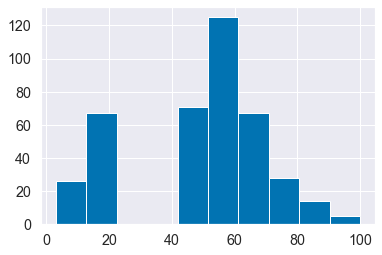

In [112]:
candidate_new_strains['growth_tmp'].hist();

## Results after running preprocessing/select_strains.py

In [116]:
assembly_df = pd.read_csv(os.path.join(os.getcwd(), 'data/NCBI_selected_assemblies.csv'))
len(assembly_df)

3470

In [118]:
species_traits_path = os.path.join(os.getcwd(), 'data/condensed_traits/condensed_species_NCBI.csv')
species_traits = pd.read_csv(species_traits_path)
species_traits['species_taxid'] = species_traits['species_tax_id']
species_traits = species_traits.set_index('species_taxid')

In [119]:
assembly_df['growth_tmp'] = assembly_df['species_taxid'].apply(lambda sid: species_traits.loc[sid]['growth_tmp'])

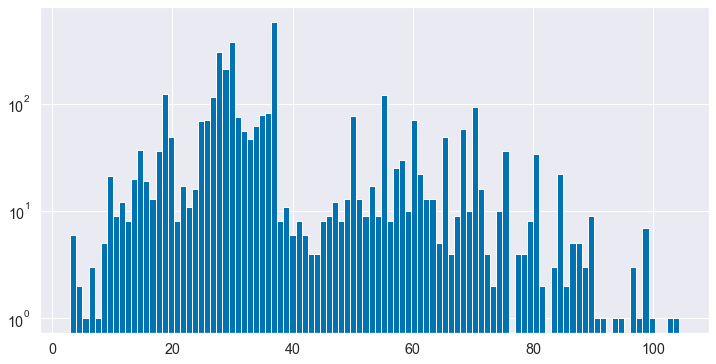

In [127]:
assembly_df['growth_tmp'].hist(figsize=(12, 6), bins=100, log=True);

In [131]:
def count_temperatures(temperatures):
    categories_count = collections.defaultdict(int)
    for i, t in enumerate(temperatures):
        if t < 20:
            categories_count['psychrophiles'] += 1
        elif t >= 20 and t < 45:
            categories_count['mesophiles'] += 1
        elif t >= 45 and t < 75:
            categories_count['thermophiles'] += 1
        else:
            categories_count['hyperthermophiles'] += 1
        
    return dict(categories_count)

In [132]:
count_temperatures(assembly_df['growth_tmp'].values)

{'mesophiles': 2226,
 'thermophiles': 746,
 'hyperthermophiles': 154,
 'psychrophiles': 344}